In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Fish.csv")
print('Shape of dataset= ', df.shape) # To get no of rows and columns
df.head(5) # head(n) returns first n records only. Can also use sample(n) for random n records.

Shape of dataset=  (159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'},inplace = True) # 'inplace= true' to make change in current dataframe
df.sample(5) # Display random 5 records

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
10,Bream,475.0,28.4,31.0,36.2,14.2628,5.1042
59,Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736
62,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
27,Bream,714.0,32.7,36.0,41.5,16.5170,5.8515
37,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
df.isna().sum() # ambil sum all Nan values pada tiap kolom

Species        0
Weight         0
VerticalLen    0
DiagonalLen    0
CrossLen       0
Height         0
Width          0
dtype: int64

In [6]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [7]:
df_sp = df.Species.value_counts()
df_sp = pd.DataFrame(df_sp)
df_sp.T 

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


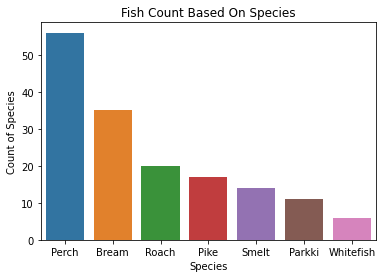

In [8]:
sns.barplot(x= df_sp.index, y = df_sp.Species) #label dari dataframe
plt.xlabel('Species')
plt.ylabel('Count of Species')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Fish Count Based On Species')
plt.show()

In [9]:
df[df.Weight <= 0]

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [10]:
df1 = df.drop([40])
print('New dimension of dataset is= ', df1.shape)
df1.head(5)

New dimension of dataset is=  (158, 7)


,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [11]:
df1.corr()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
VerticalLen,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
DiagonalLen,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
CrossLen,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

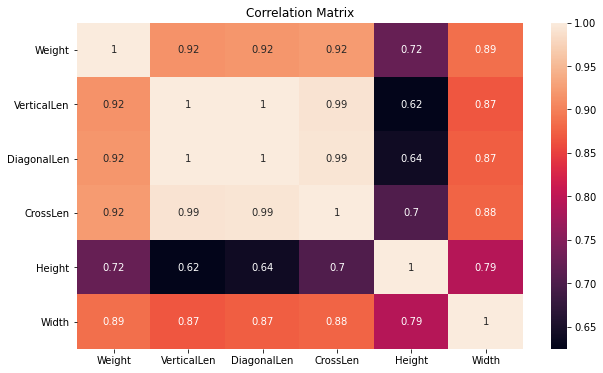

In [12]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
sns.heatmap(df1.corr(), annot =True)
plt.title('Correlation Matrix')

In [13]:
df2 = df1.drop(['VerticalLen', 'DiagonalLen', 'CrossLen'], axis =1) # Can also use axis = 'columns'
print('New dimension of dataset is= ', df2.shape)
df2.head()

New dimension of dataset is=  (158, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


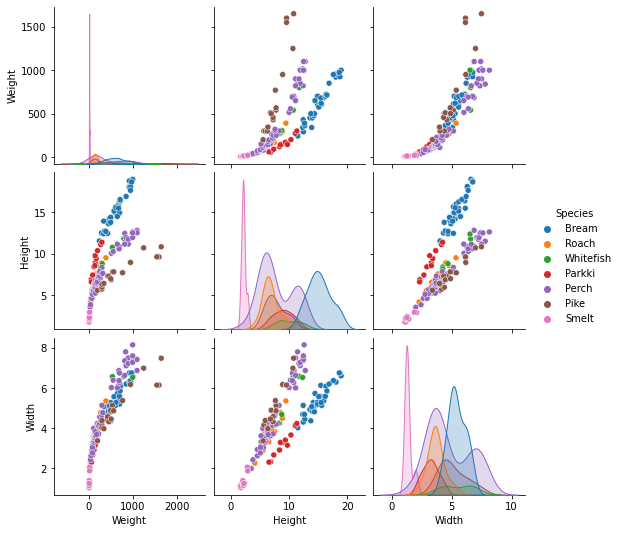

In [14]:
sns.pairplot(df2, kind = 'scatter', hue = 'Species')

Text(0.5, 1.0, 'Outlier Detection based on Weight')

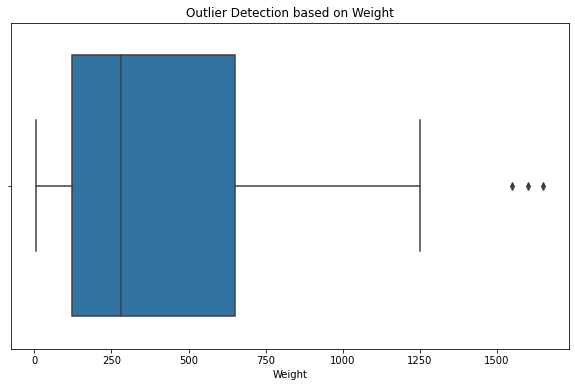

In [15]:
sns.boxplot(x=df2['Weight'])
plt.title('Outlier Detection based on Weight')

In [16]:
def outlier_detection(dataframe):
  Q1 = dataframe.quantile(0.25)
  Q3 = dataframe.quantile(0.75)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR 
  outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
  return outlier

In [17]:
outlier_detection(df2['Weight'])

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Text(0.5, 1.0, 'Outlier Detection based on Height')

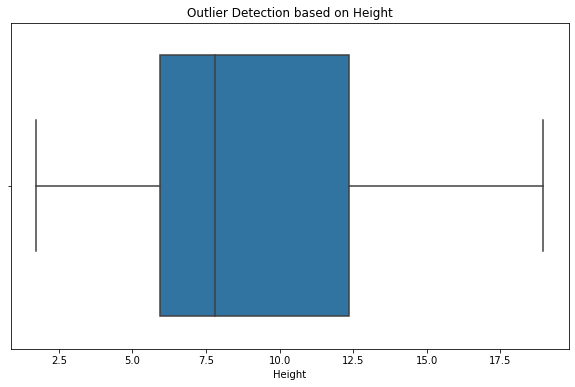

In [18]:
sns.boxplot(x =df2['Height'])
plt.title('Outlier Detection based on Height')

Text(0.5, 1.0, 'Outlier Detection based on Width')

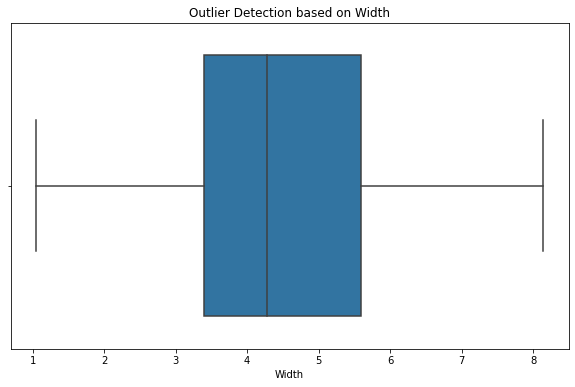

In [19]:
sns.boxplot(x = df2['Width'])
plt.title('Outlier Detection based on Width')

In [20]:
df3 = df2.drop([142,143,144])
df3.shape

(155, 4)

In [21]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,155.0,377.638065,319.144511,5.9000,120.00000,272.0000,615.00000,1250.000
Height,155.0,8.967102,4.333722,1.7284,5.92695,7.6800,12.37930,18.957
Width,155.0,4.382326,1.675564,1.0476,3.38565,4.2476,5.47275,8.142


In [22]:
#X = df3.iloc[:,[2,3]] # Select columns using column index
X = df3[['Height','Width']] # Select columns using column name
X.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [23]:
#y = df3.iloc[:,[1]] # Select columns using column index
y = df3[['Weight']]
y.head(5)

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


In [24]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42) 
# Use paramter 'random_state=1' if you want keep results same everytime you execute above code
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (124, 2)
X_test dimension=  (31, 2)
y_train dimension=  (124, 1)
y_train dimension=  (31, 1)


In [25]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
print('coef= ', model.coef_) # Since we have two features(Height and Width), there will be 2 coef
print('intercept= ', model.intercept_)
print('score= ', model.score(X_test,y_test))

coef=  [[ 10.40686081 151.73209963]]
intercept=  [-386.16761436]
score=  0.896022997657309


In [27]:
predictedWeight = pd.DataFrame(model.predict(X_test), columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Weight,110.000000,7.500000,955.000000,1000.0000,850.000000,55.000000,150.000000,10.000000,19.700000,200.000000,...,500.000000,500.000000,700.000000,273.000000,430.000000,225.000000,140.000000,120.000000,130.000000,1000.000000
Predicted Weight,212.481055,-189.636049,756.728427,813.0023,816.240658,38.098095,218.321182,-168.334196,-42.610188,277.385406,...,419.788276,514.386807,630.875714,358.001479,384.100355,254.628228,186.506555,207.382732,216.491025,896.328271


Text(0.5, 1.0, 'Weight From test Data Vs Weight Predicted By Model')

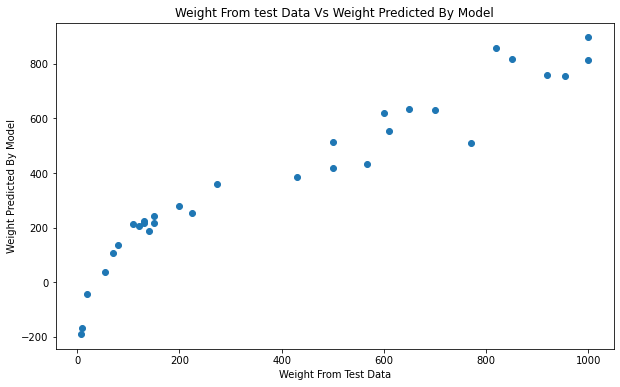

In [28]:
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Weight From Test Data')
plt.ylabel('Weight Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Weight From test Data Vs Weight Predicted By Model")

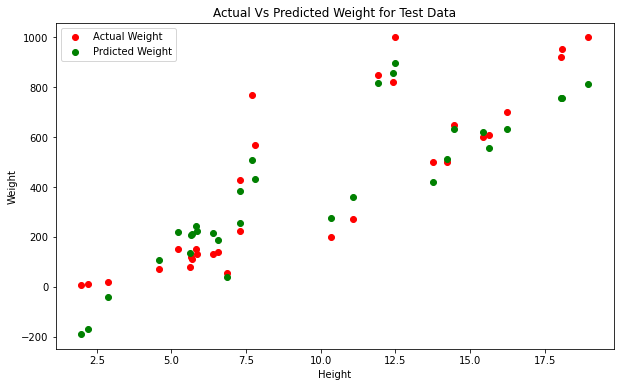

In [29]:
plt.scatter(X_test['Height'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Height'], model.predict(X_test), color='green', label = 'Prdicted Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()


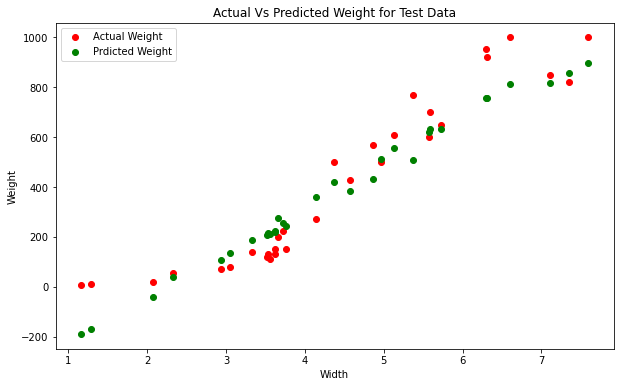

In [30]:
plt.scatter(X_test['Width'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Width'], model.predict(X_test), color='green', label = 'Prdicted Weight')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Histogram of Residuals')

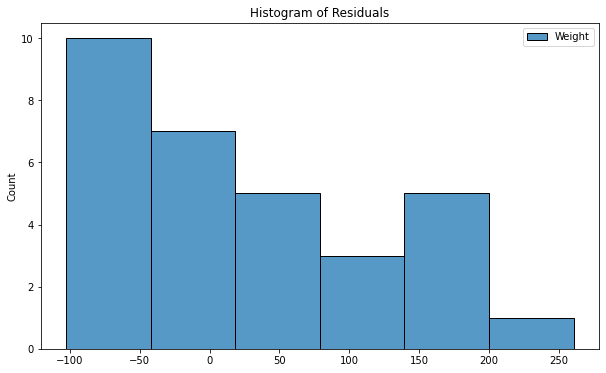

In [32]:
sns.histplot((y_test-model.predict(X_test)))
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Histogram of Residuals")